<a href="https://colab.research.google.com/github/manika-lamba/SP26-LIS4_5693/blob/main/Introduction_to_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of spaCy

We will learn how to do natural language processing (NLP) with spaCy. We will approach spaCy top-down. In this way, we will gain an understanding of NLP generally and spaCy's mechanics specifically. By learning these concepts first, it will make it easier to approach spaCy in code.

## What is spaCy?
spaCy (yes, spelled with a lowercase "s" and uppercase "C") is a natural language processing framework. Natural language processing, or NLP, is a branch of linguistics that seeks to parse human language in a computer system. This field is generally referred to as computational linguistics, though it has far-reaching applications beyond academic linguistic research.

NLP is used in every sector of industry, from academics who leverage it to aid in research to financial analysts who try to predict the stock market. Lawyers use NLP to help analyze thousands of legal documents in seconds to target their research, and medical doctors use it to parse patient charts. NLP has been around for decades, but with the increasing developments in deep learning, a subfield of machine learning, NLP has rapidly expanded.

This is because, as you have already seen in  Week 2 Text in Context, language is inherently ambiguous and complex. By this, I mean that language does not always make perfect sense. In some cases, it is entirely illogical. The double-negative in English is a good example of this. In some contexts, it can be a positive, as in *"I don't not like pasta."* In other cases, the double negative can be an emphatic negative, as in, *"I ain't not doing that!"*

As humans, especially native speakers of a language, we can parse these complex, illogical statements with ease, especially with enough context. For computers, this is not always easy.

Because NLP is such a complex problem for computers, it requires a complex solution. The answer has been found in artificial neural networks, or ANNs, or neural nets for short. These are the primary areas of research for deep learning practitioners. As the field of deep learning (and machine learning in general) expands and advances, so too does NLP. New methods for training, such as transformer models, push the field further.

## How to Install spaCy?

In order to install spaCy, I recommend visiting their website, here: https://spacy.io/usage. The web-app will automatically populate the commands that you need to execute to get started. As we have seen already in later modules, we can install the spaCy library with a *“!”* in the Google Colab's cell to indicate that we want to run a terminal command. We will be install spaCy and thee small English model, `en_core_web_sm`.

- `!pip install spacy`

- `!python -m spacy download en_core_web_sm`

Now that we’ve installed spaCy let’s import it to make sure we installed it correctly using `import spacy`.

Great! Now, let’s make sure we downloaded the model successfully with `nlp = spacy.load("en_core_web_sm")`

Excellent! spaCy is now installed correctly, and we have successfully downloaded the small English model. We will pick up here with the code in the next notebook. For now, I want to focus on big-picture items, specifically spaCy

## Containers

Containers are spaCy objects that contain a large quantity of data about a text. When we analyze texts with the spaCy framework, we create different container objects to do that. Here is a full list of all spaCy containers. We will be focusing on three (emboldened): **Doc, Span, and Token**.

- **Doc**
- DocBin
- Example
- Language
- Lexeme
- **Span**
- SpanGroup
- **Token**

The image below shows that at the top, we have a **Doc** container. This is the basis for all spaCy. It is the main object that we create. Within the Doc container are many different attributes and subcontainers. One attribute is the Doc.sents, which contains all the sentences in the Doc container. The doc container (and each sentence generator) is made up of a set of token containers. These are things like words, punctuation, etc.

**Span** containers are kind of like a **token**, in that they are a piece of a Doc container. Spans have one thing that makes them unique. They can cross multiple tokens.mWe can give spans a bit more specificity by classifying them into different groups. These are known as SpanGroup containers.


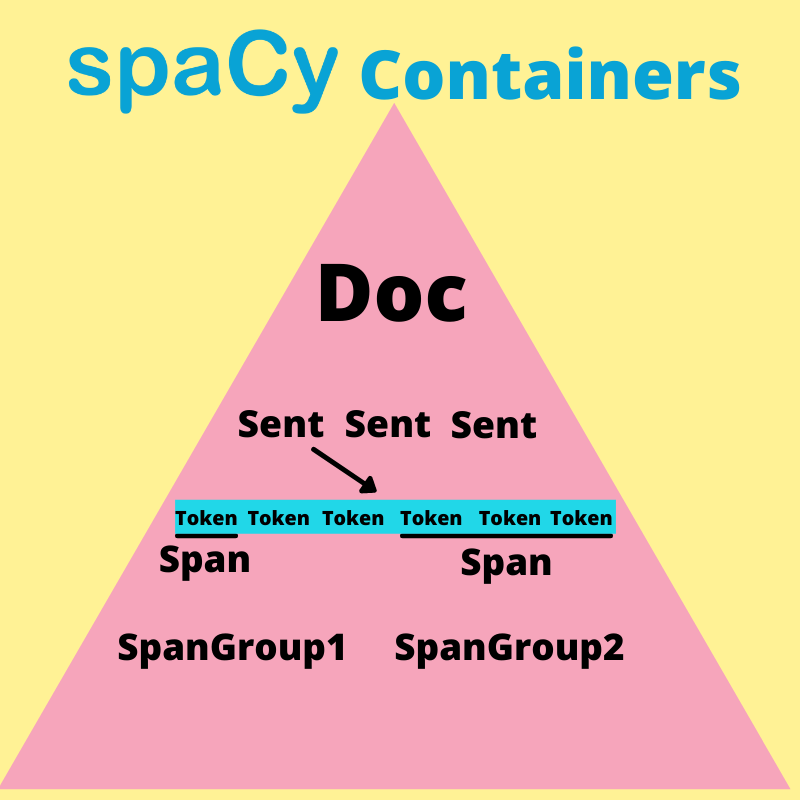

If you do not fully understand this dynamic, do not worry. You will get a much better sense of this pyramid as we move forward. For now, I recommend keeping this image handy so you can refer back to it as we progress to explore the basics of spaCy. Next, we will start applying these concepts in code by creating a doc object and learning about the different attributes containers have as well as how to find the linguistic annotations.

# PART A: Getting Started with spaCy and its Linguistic Annotations

The goal of this section are twofold. First, it is my hope that you understand the basic spaCy syntax for creating a Doc container and how to call specific attributes of that container. Second, it is my hope that you leave this section with a basic understanding of the vast linguistic annotations available in spaCy. While we will not explore all attributes, we will deal with many of the most important ones, such as lemmas, parts-of-speech, and named entities. By the time you are finished with this lab, you should have enough of a basic understanding of spaCy to begin applying it to your own texts.

## Importing spaCy and Loading Data

As with all Python libraries, the first thing we need to do is import spaCy. I walked you through how to install it and download the small English model above. If you have followed those steps, you should be able to import it like so:

In [1]:
import spacy

With spaCy imported, we can now create our nlp object. This is the standard Pythonic way to create your model in a Python script. Unless you are working with multiple models in a script, try to always name your model, nlp. It will make your script much easier to read. To do this, we will use spacy.load(). This command tells spaCy to load up a model. In order to know which model to load, it needs a string argument that corresponds to the model name. Since we will be working with the small English model, we will use "en_core_web_sm". This function can take keyword arguments to identify which parts of the model you want to load, but we will get to that later. For now, we want to import the whole thing.

In [2]:
nlp = spacy.load("en_core_web_sm")

Great! With the model loaded, let's go ahead and import our text. Our sample data is the opening description from the Wikipedia article on the United States. I added the sample to my github repo and fetching it directly from there using the following code:

In [3]:
import requests

url = "https://raw.githubusercontent.com/manika-lamba/SP26-LIS4_5693/refs/heads/main/lab-2/wiki_us.txt"
response = requests.get(url)
response.raise_for_status() # Raise an exception for HTTP errors
text = response.text

Now, let's see what this text looks like. It can be a bit difficult to read it here, but notice the horizontal slider below. You don't neeed to read this in its entirety.

In [4]:
print(text)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country located in North America. It consists of 50 states, a federal district, five major unincorporated territories, nine Minor Outlying Islands, and 326 Indian reservations. It is the third-largest country by both land and total area. The United States shares land borders with Canada to its north and with Mexico to its south. It has maritime borders with the Bahamas, Cuba, Russia, and other nations. With a population of over 331 million, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city and financial center is New York City.


## Creating a Doc Container

With the data loaded in, it's time to make our first Doc container. Unless you are working with multiple Doc containers, it is best practice to always call this object "doc", all lowercase. To create a doc container, we will usually just call our nlp object and pass our text to it as a single argument.

In [5]:
doc = nlp(text)

Great! Let's see what this looks like.

In [6]:
print (doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country located in North America. It consists of 50 states, a federal district, five major unincorporated territories, nine Minor Outlying Islands, and 326 Indian reservations. It is the third-largest country by both land and total area. The United States shares land borders with Canada to its north and with Mexico to its south. It has maritime borders with the Bahamas, Cuba, Russia, and other nations. With a population of over 331 million, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city and financial center is New York City.


If you are trying to spot the difference between this and the text above, good luck. You will not see a difference when printing off the doc container. But I promise you, it is quite different behind the scenes. The Doc container, unlike the text object, contains a lot of valuable metadata, or attributes, hidden behind it. To prove this, let's examine the length of the doc object and the text object.

In [7]:
print (len(doc))
print (len(text))

146
716


What's going on here? It is the same text, but different length. Why does this occur? To answer that, let's explore it more deeply and try and print off each item in each object.

In [8]:
for token in text[:10]:
    print (token)

T
h
e
 
U
n
i
t
e
d


As we would expect. We have printed off each character, including white spaces. Let's try and do the same with the Doc container.

In [9]:
for token in doc[:10]:
    print (token)

The
United
States
of
America
(
U.S.A.
or
USA
)


And now we see the magical difference. While on the surface it may seem that the Doc container's length is dependent on the quantity of words, look more closely. You should notice that the open and close parentheses are also considered an item in the container. These are all known as tokens. **Tokens** are a fundamental building block of spaCy or any NLP framework. They can be words or punctuation marks. Tokens are something that has syntactic purpose in a sentence and is self-contained. A good example of this is the contraction "don't" in English. When tokenized, or the process of converting the text into tokens, we will have two tokens. "do" and "n't" because the contraction represents two words, "do" and "not".

On the surface, this may not seem exceptional. But it is. You may be thinking to yourself that you could easily use the split method in Python to split by whitespace and have the same result. But you'd be wrong. Let's see why.

In [10]:
for token in text.split()[:10]:
    print (token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


Notice that the parentheses are not removed or handled individually. To see this more clearly, let's print off all tokens from index 5 to 8 in both the text and doc objects.

In [12]:
words = text.split()[:10]

In [13]:
i=5
for token in doc[i:8]:
    print (f"SpaCy Token {i}:\n{token}\nWord Split {i}:\n{words[i]}\n\n")
    i=i+1

SpaCy Token 5:
(
Word Split 5:
(U.S.A.


SpaCy Token 6:
U.S.A.
Word Split 6:
or


SpaCy Token 7:
or
Word Split 7:
USA),




We can see clearly now how the spaCy Doc container does much more with its tokenization than a simple split method. We could, surely, write complex rules for a language to achieve the same results, but why bother? SpaCy does it exceptionally well for all languages. In my entire time using spaCy, I have never seen the tokenizer make a mistake. I am sure that mistakes may occur, but these are probably rare exceptions.

Let's see what else this Doc Container holds.

## Sentence Boundary Detection (SBD)

In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split("."), but in English we use the period to also denote abbreviation. You could, again, write rules to look for periods not proceeded by a lowercase word, but again, I ask the question, "why bother?". We can use spaCy and in seconds have all sentences fully separated through SBD.

To access the sentences in the Doc container, we can use the attribute sents, like so:

In [14]:
for sent in doc.sents:
    print (sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, nine Minor Outlying Islands, and 326 Indian reservations.
It is the third-largest country by both land and total area.
The United States shares land borders with Canada to its north and with Mexico to its south.
It has maritime borders with the Bahamas, Cuba, Russia, and other nations.
With a population of over 331 million, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city and financial center is New York City.


We got an error. That is because the sents attribute is a Span container that is stored as a generator. Generators are beyond the scope of this course, but in short generators will `yield` results from functions rather than `return` results. While you can iterate over a generator like a list, they are not the same thing. Instead of populating all results in memory, a generator lets us only load one result at a time. We can use `next` to grab the first sentence.

In [15]:
sentence1 = next(doc.sents)
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country located in North America.


Now we have the first sentence. Now that we have a smaller text, let's explore spaCy's other building block, the token.

## Token Attributes

The token object contains a lot of different attributes that are VITAL do performing NLP in spaCy. We will be working with a few of them, such as:

| Name       | Description                                |
|------------|--------------------------------------------|
| sent       | the sentence to which the span blongs      |
| text       | the raw text of the token                  |
| head       | the parent of the token                    |
| left_edge  | the left edge of the token's descendents   |
| right_edge | the right edge of the token's descendents  |
| ent_type_  | the label of the token, if it is an entity |
| lemma_     | the lemmatized form of the token           |
| morph      | provides the morphology of the token       |
| pos_       | part of speech                             |
| dep_       | dependency relation                        |
| lang_      | the language of the parent document        |

I will briefly describe these here and show you how to grab each one and what they look like. To demonstrate each of these attributes, we will use one token, "States" which is part of a sequence of tokens that make up "The United States of America"

In [16]:
token2 = sentence1[2]
print (token2)

States


### Text

```Verbatim text content.``` -spaCy docs

In [17]:
token2.text

'States'

### Head

```The syntactic parent, or “governor”, of this token.``` -spaCy docs

In [18]:
token2.head

is

This tells to which word it is governed by, in this case, the primary verb, "is", as it is part of the noun subject.

### Left Edge

``` The leftmost token of this token’s syntactic descendants.``` -spaCy docs

In [19]:
token2.left_edge

The

If part of a sequence of tokens that are collectively meaningful, known as **multi-word tokens**, this will tell us where the multi-word token begins.

### Right Edge

``` The rightmost token of this token’s syntactic descendants.``` -spaCy docs

In [20]:
token2.right_edge

,

This will tell us where the multi-word token ends.

### Entity Type

``` Named entity type.``` -spaCy docs

In [21]:
token2.ent_type

384

Note the absence of the _ at the end of the attribute. This will return an integer that corresponds to an entity type, where as _ will give you the string equivalent., as in below.

In [22]:
token2.ent_type_

'GPE'

We will learn all about types of entities on named entity recognition, or NER. For now, simply understand that GPE is geopolitical entity and is correct.

### Ent IOB

```IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.```

In [23]:
token2.ent_iob_

'I'

IOB is a method of annotating a text. In this case, we see "I" because states is inside an entity, that is to say that it is part of the United States of America.

### Lemma

```Base form of the token, with no inflectional suffixes.``` -spaCy docs

In [24]:
token2.lemma_

'States'

In [25]:
sentence1[12].lemma_

'know'

### Morph

```Morphological analysis``` -spaCy docs

In [26]:
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

### Part of Speech

```Coarse-grained part-of-speech from the Universal POS tag set.``` -spaCy docs

In [27]:
token2.pos_

'PROPN'

### Syntactic Dependency

```Syntactic dependency relation.``` -spaCy docs

In [28]:
token2.dep_

'nsubj'

### Language

```Language of the parent document’s vocabulary.``` -spaCy docs

In [29]:
token2.lang_

'en'

## Part of Speech Tagging (POS)

In the field of computational linguistics, understanding parts-of-speech is essential. SpaCy offers an easy way to parse a text and identify its parts of speech. Below, we will iterate across each token (word or punctuation) in the text and identify its part of speech.

In [30]:
for token in sentence1:
    print (token.text, token.pos_, token.dep_)

The DET det
United PROPN compound
States PROPN nsubj
of ADP prep
America PROPN pobj
( PUNCT punct
U.S.A. PROPN appos
or CCONJ cc
USA PROPN conj
) PUNCT punct
, PUNCT punct
commonly ADV advmod
known VERB acl
as ADP prep
the DET det
United PROPN compound
States PROPN pobj
( PUNCT punct
U.S. PROPN appos
or CCONJ cc
US PROPN conj
) PUNCT punct
or CCONJ cc
America PROPN conj
, PUNCT punct
is AUX ROOT
a DET det
country NOUN attr
located VERB acl
in ADP prep
North PROPN compound
America PROPN pobj
. PUNCT punct


Here, we can see two vital pieces of information: the string and the corresponding part-of-speech (pos). For a complete list of the pos labels, see the spaCy documentation (https://spacy.io/api/annotation#pos-tagging). Most of these, however, should be apparent, i.e. PROPN is proper noun, AUX is an auxiliary verb, ADJ, is adjective, etc. We can visualize this sentence with a diagram through spaCy's displaCy Notebook feature. To make this easier to read, we will be using a different, smaller sentence.

In [31]:
from spacy import displacy
sample_doc = nlp("The dog ran over the fence.")
displacy.render(sample_doc, style="dep", options={"compact":True})

## Named Entity Recognition

Another essential task of NLP, is named entity recognition, or NER. Here, I’d like to demonstrate how to perform basic NER via spaCy. Again, we will iterate over the doc object as we did above, but instead of iterating over `doc.sents`, we will iterate over `doc.ents`. For our purposes right now, I simply want to print off each entity’s text (the string itself) and its corresponding label (note the _ after label).

In [32]:
for ent in doc.ents:
    print (ent.text, ent.label_)

The United States of America GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
nine CARDINAL
Minor Outlying Islands ORG
326 CARDINAL
Indian NORP
third ORDINAL
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
Russia GPE
over 331 million MONEY
third ORDINAL
Washington GPE
D.C. GPE
New York City GPE


Sometimes it can be difficult to read this output as raw data. In this case, we can again leverage spaCy's displaCy feature. Notice that this time we are altering the keyword argument, style, with the string "ent". This tells displaCy to display the text as NER annotations

In [33]:
displacy.render(doc, style="ent")

I recommend spending a little bit of time going through this notebook a few times. The information covered throughout this notebook will be reinforced as we explore each of these areas in more depth in future modules.

# PART B: spaCy’s Pipelines

Now that we understand the basics of spaCy’s linguistic features, let’s explore pipelines in spaCy. As we have seen, spaCy offers both heuristic (rules-based) and machine learning natural language processing solutions. These solutions are activated by pipes. Here, we will explore pipes and pipelines generally and the ones offered by spaCy specifically. Next, we will explore how you can create custom pipes and add them to a spaCy pipeline.

## Standard Pipes (Components and Factories) Available from spaCy

SpaCy is much more than an NLP framework. It is also a way of designing and implementing complex pipelines.

A **pipe** is a component of a **pipeline**. A pipeline’s purpose is to take input data, perform some sort of operations on that input data, and then output those operations either as a new data or extracted metadata. A pipe is an individual component of a pipeline. In the case of spaCy, there are a few different pipes that perform different tasks:

- Tokenizer, tokenizes the text into individual tokens
- Parser, parses the text
- NER identifies entities and labels them accordingly

All of this data is stored in the Doc object. It is important to remember that pipelines are sequential. This means that components earlier in a pipeline affect what later components receive. Sometimes this sequence is essential, meaning later pipes depend on earlier pipes. At other times, this sequence is not essential, meaning later pipes can function without earlier pipes. It is important to keep this in mind as you create custom spaCy models (or any pipeline for that matter).

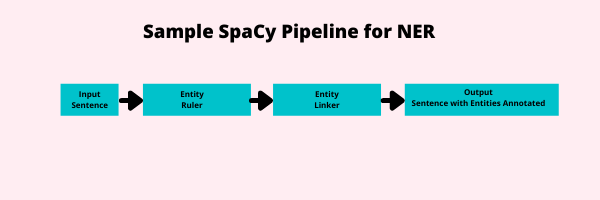

Here, we see an input, in this case a sentence, enter the pipeline from the left. Two pipes are activated on this, a rules-based named entity recognizer known as an **EntityRuler** which finds entities and an **EntityLinker** pipe that identifies what entity that is to perform toponym resolution. The sentence is then outputted with the sentence and the entities annotated.

At this point, we could use the `doc.ents` feature to find the entities in our sentence. In spaCy, you will often use pipelines that are more sophisticated than this. You will specifically use a `Tok2Vec` input layer to vectorize your input sentence. This will allow machine learning pipes to make predictions.

Below is a complete list of the AttributeRuler pipes available to you from spaCy and the Matchers.

### Attribute Rulers

- Dependency Parser
- EntityLinker
- EntityRecognizer
- EntityRuler
- Lemmatizer
- Morpholog
- SentenceRecognizer
- Sentencizer
- SpanCategorizer
- Tagger
- TextCategorizer
- Tok2Vec
- Tokenizer
- TrainablePipe
- Transformer

### Matchers

- DependencyMatcher
- Matcher
- PhraseMatcher



## How to Add Pipes

In most cases, you will use an off-the-shelf spaCy model. In some cases, however, an off-the-shelf model will not fill your needs or will perform a specific task very slowly. A good example of this is ** sentence tokenization**.

Imagine if you had a document that was around 1 million sentences long. Even if you used the small English model, your model would take a long time to process those 1 million sentences and separate them. In this instance, you would want to make a blank English model and simply add the Sentencizer to it.

The reason is because each pipe in a pipeline will be activated (unless specified) and that means that each pipe from Dependency Parser to named entity recognition will be performed on your data. This is a serious waste of computational resources and time. The small model may take hours to achieve this task. By creating a blank model and simply adding a Sentencizer to it, you can reduce this time to merely minutes.

To demonstrate this process, let’s first create a blank model.

In [34]:
nlp = spacy.blank("en")

Here, notice that we have used `spacy.blank`, rather than `spacy.load`. When we create a blank model, we simply pass the two letter combination for a language, in this case, **`en`** for English. Now, let’s use the `add_pipe()` command to add a new pipe to it. We will simply add a sentencizer.

In [35]:
nlp.add_pipe("sentencizer")

In [36]:
import requests
from bs4 import BeautifulSoup
s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")[:100000]

In [37]:
%%time
doc = nlp(soup)
print(len(list(doc.sents)))

500
CPU times: user 476 ms, sys: 136 µs, total: 476 ms
Wall time: 495 ms


In [38]:
nlp2 = spacy.load("en_core_web_sm")

In [39]:
%%time
doc = nlp2(soup)
print (len(list(doc.sents)))

760
CPU times: user 3.79 s, sys: 278 ms, total: 4.06 s
Wall time: 4.29 s


The difference in time here is remarkable. Our text string was 100,000 characters. The blank model with just the Sentencizer completed its task in 476 milliseconds and found 500 sentences. The small English model, the most efficient one offered by spaCy, did the same task in 3.79 seconds and found 760 sentences. The small English model, in other words, took much longer. This time increases significantly as your texts get larger. The reason for this large difference in time is the other components active in the spaCy pipeline, such as the POS Tagger and NER pipes.

Often times you need to find sentences quickly, not necessarily accurately. In these instances, it makes sense to know tricks like the one above.



## Rules-Based spaCy

We will build upon our previous knowledge of spaCy by exploring some of its rules-based pipes, specifically the PhraseMatcher, and custom RegEx-based pipes.

### PhraseMatcher

PhraseMatcher is a rule-based component that does not sit inside a spaCy pipeline. It does not, therefore, align with a spaCy extension, such as *doc.ents*. Instead, it is meant to run over a *Doc container*.

**PhraseMatcher does not function a sequence of linguistic features at the token level, rather it is focused on matching at the phrase level.**

In practice, PhraseMatcher should be used when you know relatively well how the data will appear in a text.

First, let’s import the PhraseMatcher class and load up the default small English pipeline.



In [40]:
import spacy
from spacy.matcher import PhraseMatcher

In [41]:
nlp = spacy.load("en_core_web_sm")

Now, let’s consider a basic example. Let’s consider the text below. Here, we wish to find and extract the instances where Harry Potter appears in the text. Harry appears in four different ways in the text: 1) Harry Potter, 2) Harry, 3) Potter, and 4) The Boy who Lived.

In [42]:
text = """
Harry Potter was the main character in the book.
Harry was a normal boy who discovered he was a wizard.
Ultimately, Potter goes to Hogwarts.
He is also known as the Boy who Lived.
The Boy who Lived has an enemy named Voldemorte who is known as He who Must not be Named.
"""

In [43]:
matcher = PhraseMatcher(nlp.vocab)

In [44]:
matcher.add("HARRY_POTTER", [nlp("Harry Potter"), nlp("Harry"), nlp("Potter"), nlp("the Boy who Lived")])

In [45]:
doc = nlp(text)

Again, we will create our matches.

In [46]:
matches = matcher(doc)

Let’s iterate over our matches.

In [47]:
for match in matches:
    print(match)

(12243270181114079557, 1, 2)
(12243270181114079557, 1, 3)
(12243270181114079557, 2, 3)
(12243270181114079557, 12, 13)
(12243270181114079557, 27, 28)
(12243270181114079557, 38, 42)


And now let’s iterate over our matches and grab a bit more data, including the token spans and the sentence in which a match was found.

In [48]:
for match in matches:
    lexeme, start, end = match
    print(nlp.vocab[lexeme].text, doc[start:end])
    print(f"Sentence: {doc[start].sent}")

HARRY_POTTER Harry
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Harry Potter
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Potter
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Harry
Sentence: Harry was a normal boy who discovered he was a wizard.

HARRY_POTTER Potter
Sentence: Ultimately, Potter goes to Hogwarts.

HARRY_POTTER the Boy who Lived
Sentence: He is also known as the Boy who Lived.



As we can tell, the results are good, but we are missing one case. The second example of `boy who lived` was not grabbed because `The` was not capitalized. We can account for this by changing the main attribute of the PhraseMatcher.

### Setting a Custom Attribute

PhraseMatcher does not let us control how it reads each individual token in the pattern. The way the PhraseMatcher parses the phrase is as the sequence level. By default, the PhraseMatcher reads the entire pattern as `ORTH`, or raw text.

In other words, it must be a precise match in order to be flagged and extracted. In some instances, however, it may be important for a pattern to be not just raw text, but also in all forms, both uppercase and lowercase. This is particularly important for phrases, like the `boy who lived`, where the word `the` may be capitalized if it is at the start of a sentence. In these instances, we can change the main way the PhraseMatcher works by using the `attr` argument. By using `attr="LOWER"`, we can make our PhraseMatcher pattern case-agnostic.

In [49]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

In [50]:
matcher.add("HARRY_POTTER", [nlp("Harry Potter"), nlp("Harry"), nlp("Potter"), nlp("the Boy who Lived")])

In [51]:
doc = nlp(text)

In [52]:
matches = matcher(doc)

In [53]:
for match in matches:
    lexeme, start, end = match
    print(nlp.vocab[lexeme].text, doc[start:end])
    print(f"Sentence: {doc[start].sent}")

HARRY_POTTER Harry
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Harry Potter
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Potter
Sentence: 
Harry Potter was the main character in the book.

HARRY_POTTER Harry
Sentence: Harry was a normal boy who discovered he was a wizard.

HARRY_POTTER Potter
Sentence: Ultimately, Potter goes to Hogwarts.

HARRY_POTTER the Boy who Lived
Sentence: He is also known as the Boy who Lived.

HARRY_POTTER The Boy who Lived
Sentence: The Boy who Lived has an enemy named Voldemorte who is known as He who Must not be Named.



Notice that now, we have grabbed all ways the phrase `the boy who lived` is expressed in our text!

## Adding a Function with `on_match`

In production, it can sometimes be difficult to deploy a spaCy-based solution that requires pasting a for loop each time you want to iterate over the results. Usually, you want to automate certain tasks so that when a match is found, some event occurs in your code. The PhraseMatcher allows you to pass an extra argument to your patterns: `on_match`. This keyword argument will take a function which will receive four arguments from the PhraseMatcher: `matcher` (the PhraseMatcher), `doc` (the doc container that the PhraseMatcher just passed over), `id`, and `matches` (the resulting matches from the PhraseMatcher).

Let’s create a basic function that will iterate over each match and print off the match, its label, and the sentence in which it was found.

In [54]:
def on_match(matcher, doc, id, matches):
    for match in matches:
        lexeme, start, end = match
        print(nlp.vocab[lexeme].text, doc[start:end])
        print(f"Sentence: {doc[start].sent}")

Just as before, we will create our PhraseMatcher.



In [55]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

This time, however, when we add our patterns to the PhraseMatcher, we will also add the keyword argument `on_match` that will point to the above function.

In [56]:
matcher.add("HARRY_POTTER", [nlp("Harry Potter")], on_match=on_match)

All that is left to do is then create the Doc container from the text and then run the PhraseMatcher over the Doc container.

In [57]:
doc = nlp(text)
matches = matcher(doc)

HARRY_POTTER Harry Potter
Sentence: 
Harry Potter was the main character in the book.



Just like the PhraseMatcher, the Matcher also can take the `on_match` keyword argument.